### Pergunta:

## Criando o dataset de teste

1) Importando as bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import spotipy
import matplotlib.pyplot as plt
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

2) Autenticando o dataset e pegando a playlist do spotify:

In [2]:
def show_tracks(tracks):
    for i, item in enumerate(tracks['items']):
        track = item['track']
        print("   %d %32.32s %s" % (i, track['artists'][0]['name'],
            track['name']))

In [3]:
client_id = '06af41ff24c04e7fa9c215fb40fb7c3a'
client_secret = 'd73b01728a3c452dbfceac8e75f74f87'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


lista = []
playlists = sp.user_playlists('spotify')
for playlist in playlists['items']:
    if playlist['name'] == "Today's Top Hits":
        print(playlist['name'])
        results = sp.user_playlist('spotify', playlist['id'], fields='tracks')
        tracks = results['tracks']
        show_tracks(tracks)
        lista.append(tracks)

Today's Top Hits
   0                    Ariana Grande thank u, next
   1                           Halsey Without Me
   2                      Post Malone Sunflower - Spider-Man: Into the Spider-Verse
   3                     Zara Larsson Ruin My Life
   4                     XXXTENTACION Arms Around You (feat. Maluma & Swae Lee)
   5                       Little Mix Woman Like Me (feat. Nicki Minaj)
   6                  Imagine Dragons Bad Liar
   7                             Kygo Happy Now (feat. Sandro Cavazza)
   8                   Ellie Goulding Close To Me (with Diplo) (feat. Swae Lee)
   9                    Billie Eilish when the party's over
   10                          Ava Max Sweet but Psycho
   11                     benny blanco I Found You (with Calvin Harris)
   12                           Khalid Better
   13                         Dua Lipa Kiss and Make Up
   14                         DJ Snake Taki Taki (with Selena Gomez, Ozuna & Cardi B)
   15                

3) Criando uma lista com os ids das músicas a serem analisadas:

In [4]:
lista_id = []
for e in range(len(lista[0]['items'])):
    lista_id.append(lista[0]['items'][e]['track']['id'])
lista_id

['2rPE9A1vEgShuZxxzR2tZH',
 '5p7ujcrUXASCNwRaWNHR1C',
 '1A6OTy97kk0mMdm78rHsm8',
 '5tAa8Uaqr4VvA3693mbIhU',
 '2LskIZrCeLxRvCiGP8gxlh',
 '6rrTr2HEAzlpC4KWZxF3S1',
 '2RSHsoi04658QL5xgQVov3',
 '14sOS5L36385FJ3OL8hew4',
 '5JEx7HbmvHQQswJCsoo9rA',
 '14JzyD6FlBD5z0wV5P07YI',
 '25sgk305KZfyuqVBQIahim',
 '5sdb5pMhcK44SSLsj1moUh',
 '4T3fNx3CgwDRRYgmFCbD4J',
 '7jr3iPu4O4bTCVwLMbdU2i',
 '4w8niZpiMy6qz1mntFA5uM',
 '1uru26I2JKd2mQZt0MDCUe',
 '116H0KvKr2Zl4RPuVBruDO',
 '6xtcFXSo8H9BZN637BMVKS',
 '6QfS2wq5sSC1xAJCQsTSlj',
 '2r1T6xGTVaNAqBoPH4lZEE',
 '2xLMifQCjDGFmkHkpNLD9h',
 '2hnxrRNzF74mdDzpQZQukQ',
 '58zQ7Xs38d8nDIv49iiEkX',
 '2GGMabyHXnJmjY6CXhhB2e',
 '6SkHm6poyKfzV6kc9any8k',
 '2dpaYNEQHiRxtZbfNsse99',
 '5AdnkoZJuRJCYqYBIzSqFb',
 '15kQGEy89K8deJcZVFEn0N',
 '05mAIVLkIWc2d1UBYZBCp8',
 '0Dn40gxVCMo5TkgS8Ik18Q',
 '4J4zx8xGJpuGndrVc06KaT',
 '7l3E7lcozEodtVsSTCkcaA',
 '5rBZF2fl4Avi4K0tvrQ0YF',
 '0YammaEkYSeo9vQYZ1OwS6',
 '1ArLnG0bHaHPXqf08sEKM0',
 '6r05pfZigq7Arg25pi2vRm',
 '3ji4bcQugJj5B6NRGYDNwP',
 

4) Pegando os dados das músicas:

In [5]:
results = sp.audio_features(tracks=lista_id)
print(results)

[{'danceability': 0.724, 'energy': 0.647, 'key': 1, 'loudness': -5.642, 'mode': 1, 'speechiness': 0.0658, 'acousticness': 0.28, 'instrumentalness': 0, 'liveness': 0.102, 'valence': 0.435, 'tempo': 106.96, 'type': 'audio_features', 'id': '2rPE9A1vEgShuZxxzR2tZH', 'uri': 'spotify:track:2rPE9A1vEgShuZxxzR2tZH', 'track_href': 'https://api.spotify.com/v1/tracks/2rPE9A1vEgShuZxxzR2tZH', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2rPE9A1vEgShuZxxzR2tZH', 'duration_ms': 207333, 'time_signature': 4}, {'danceability': 0.752, 'energy': 0.488, 'key': 6, 'loudness': -7.05, 'mode': 1, 'speechiness': 0.0705, 'acousticness': 0.297, 'instrumentalness': 9.11e-06, 'liveness': 0.0936, 'valence': 0.533, 'tempo': 136.041, 'type': 'audio_features', 'id': '5p7ujcrUXASCNwRaWNHR1C', 'uri': 'spotify:track:5p7ujcrUXASCNwRaWNHR1C', 'track_href': 'https://api.spotify.com/v1/tracks/5p7ujcrUXASCNwRaWNHR1C', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5p7ujcrUXASCNwRaWNHR1C', 'duration_m

5) Salvando o dataframe com os dados obtidos das músicas:

In [6]:
df = pd.DataFrame(results)
df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.2800,https://api.spotify.com/v1/audio-analysis/2rPE...,0.724,207333,0.647,2rPE9A1vEgShuZxxzR2tZH,0.000000,1,0.1020,-5.642,1,0.0658,106.960,4,https://api.spotify.com/v1/tracks/2rPE9A1vEgSh...,audio_features,spotify:track:2rPE9A1vEgShuZxxzR2tZH,0.435
1,0.2970,https://api.spotify.com/v1/audio-analysis/5p7u...,0.752,201661,0.488,5p7ujcrUXASCNwRaWNHR1C,0.000009,6,0.0936,-7.050,1,0.0705,136.041,4,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,audio_features,spotify:track:5p7ujcrUXASCNwRaWNHR1C,0.533
2,0.5510,https://api.spotify.com/v1/audio-analysis/1A6O...,0.753,158053,0.498,1A6OTy97kk0mMdm78rHsm8,0.000000,2,0.0706,-5.610,1,0.0504,89.950,4,https://api.spotify.com/v1/tracks/1A6OTy97kk0m...,audio_features,spotify:track:1A6OTy97kk0mMdm78rHsm8,0.927
3,0.4230,https://api.spotify.com/v1/audio-analysis/5tAa...,0.665,190932,0.699,5tAa8Uaqr4VvA3693mbIhU,0.000000,11,0.0969,-5.265,1,0.0578,124.896,4,https://api.spotify.com/v1/tracks/5tAa8Uaqr4Vv...,audio_features,spotify:track:5tAa8Uaqr4VvA3693mbIhU,0.585
4,0.0302,https://api.spotify.com/v1/audio-analysis/2Lsk...,0.703,198903,0.723,2LskIZrCeLxRvCiGP8gxlh,0.000002,9,0.1260,-5.450,0,0.0412,104.969,4,https://api.spotify.com/v1/tracks/2LskIZrCeLxR...,audio_features,spotify:track:2LskIZrCeLxRvCiGP8gxlh,0.288


6) Adicionando o nome das músicas e o artista no dataset:

In [7]:
nome = []
artista = []

for e in range(len(lista[0]['items'])):
    nome.append(lista[0]['items'][e]['track']['name'])
    artista.append(lista[0]['items'][e]['track']['artists'][0]['name'])
    
df['nome'] = nome
df['artista'] = artista

In [8]:
df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,nome,artista
0,0.2800,https://api.spotify.com/v1/audio-analysis/2rPE...,0.724,207333,0.647,2rPE9A1vEgShuZxxzR2tZH,0.000000,1,0.1020,-5.642,1,0.0658,106.960,4,https://api.spotify.com/v1/tracks/2rPE9A1vEgSh...,audio_features,spotify:track:2rPE9A1vEgShuZxxzR2tZH,0.435,"thank u, next",Ariana Grande
1,0.2970,https://api.spotify.com/v1/audio-analysis/5p7u...,0.752,201661,0.488,5p7ujcrUXASCNwRaWNHR1C,0.000009,6,0.0936,-7.050,1,0.0705,136.041,4,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,audio_features,spotify:track:5p7ujcrUXASCNwRaWNHR1C,0.533,Without Me,Halsey
2,0.5510,https://api.spotify.com/v1/audio-analysis/1A6O...,0.753,158053,0.498,1A6OTy97kk0mMdm78rHsm8,0.000000,2,0.0706,-5.610,1,0.0504,89.950,4,https://api.spotify.com/v1/tracks/1A6OTy97kk0m...,audio_features,spotify:track:1A6OTy97kk0mMdm78rHsm8,0.927,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone
3,0.4230,https://api.spotify.com/v1/audio-analysis/5tAa...,0.665,190932,0.699,5tAa8Uaqr4VvA3693mbIhU,0.000000,11,0.0969,-5.265,1,0.0578,124.896,4,https://api.spotify.com/v1/tracks/5tAa8Uaqr4Vv...,audio_features,spotify:track:5tAa8Uaqr4VvA3693mbIhU,0.585,Ruin My Life,Zara Larsson
4,0.0302,https://api.spotify.com/v1/audio-analysis/2Lsk...,0.703,198903,0.723,2LskIZrCeLxRvCiGP8gxlh,0.000002,9,0.1260,-5.450,0,0.0412,104.969,4,https://api.spotify.com/v1/tracks/2LskIZrCeLxR...,audio_features,spotify:track:2LskIZrCeLxRvCiGP8gxlh,0.288,Arms Around You (feat. Maluma & Swae Lee),XXXTENTACION


7) Tiramos algumas colunas do dataset de acordo com a análise exploratória feita previamente:

In [9]:
df = df.drop(df.columns[[1,3,10,13,14,15,16]], axis=1)

8) Salvamos o dataset:

In [10]:
df.to_csv('dataset.csv')

Análise das variaveis, são 10 variaveis, neste jupyter vamos fazer a regressão de todas as variaveis, comparando uma com as outras, para saber a importancia, o lance de rejeitar a hipotese nula, o r quadrado o onibus...

## Regressão Linear

Importando as bilbiotecas:

In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import probplot, norm
import matplotlib.pyplot as plt

C:\Users\vitor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Abrindo o dataset.

In [2]:
dados = pd.read_csv('featuresdf1.csv')
dados.head()

,Unnamed: 0,id,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977
1,1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,0.1200,0.2290,0.000000,0.0924,0.813,88.931
2,2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,0.1700,0.2090,0.000000,0.1120,0.846,177.833
3,3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0317,0.0498,0.000014,0.1640,0.446,103.019
4,4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,0.0367,0.0552,0.000000,0.1670,0.811,80.924


Definindo a função de regressão.

In [3]:
def regre(x, y):
    X = sm.add_constant(x)
    model = sm.OLS(y, x)
    result = model.fit()
    return result

# ANÁLISE DAS VARIÁVEIS

Com o dataset definido, e a partir da análise exploratória, verificamos a relação existente entre cada uma das variáveis.

### Primeira variável a ser analisada: energy

In [5]:
quant1 = ['danceability','speechiness', 'instrumentalness', 'liveness', 'valence', 'loudness','key','acousticness']

In [6]:
quant1_x = quant1.copy()

In [7]:
re1 = regre(dados.loc[:, quant1], dados.energy)
re1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     199.0
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           1.31e-54
Time:                        19:35:26   Log-Likelihood:                 42.759
No. Observations:                 100   AIC:                            -69.52
Df Residuals:                      92   BIC:                            -48.68
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability         0.5795      0.116      4.998      0.000       0.349       0.810
speechiness         -0.0746      0.198     -0.377      0.707      -0.467       0.318
instrumentalness     0.9922      0.646      1.536      0.128      -0.290       2.275
liveness             0.6981      0.201      3.475      0.001       0.299       1.097
valence              0.2525      0.093      2.706      0.008       0.067       0.438
loudness             0.0070      0.010      0.695      0.489      -0.013       0.027
key                  0.0115      0.004      2.653      0.009       0.003       0.020
acousticness        -0.1062      0.106     -1.005      0.317      -0.316       0.104
==============================================================================
Omnibus:                        0.538   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.664
Skew:                           0.044   Prob(JB):                        0.717
Kurtosis:                       2.611   Cond. No.                         336.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

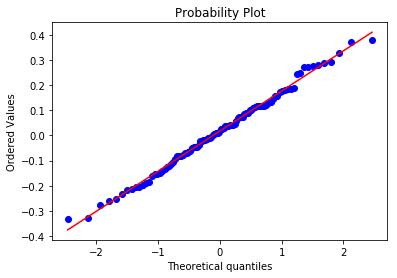

In [8]:
probplot(re1.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'energy', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) não são nulas, portanto, podemos confiar nos valores do p value mostrados na tabela. Como o p value da variável 'tempo' é um valor muito alto, chegamos à hipótese de que talvez não tenha tanta relevância se comparado à variável 'energy', e, assim, pode ser descartado. Pelo gráfico, observamos que a distibuição se aproxima de uma normal, e, como obtivemos um bom índice do R-squared (59%), podemos dizer que a variável 'energy' é fortemente relacionada com as demais.

### Segunda variável a ser analisada: danceability

In [9]:
quant2 = ['speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy']

In [10]:
quant2_x = quant2.copy()

In [11]:
re2 = regre(dados.loc[:, quant2], dados.danceability)
re2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     312.0
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.32e-64
Time:                        19:36:17   Log-Likelihood:                 65.726
No. Observations:                 100   AIC:                            -113.5
Df Residuals:                      91   BIC:                            -90.00
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
speechiness          0.0549      0.158      0.347      0.730      -0.260       0.369
instrumentalness    -0.2084      0.523     -0.399      0.691      -1.247       0.830
liveness             0.0385      0.171      0.226      0.822      -0.301       0.378
valence              0.3723      0.067      5.535      0.000       0.239       0.506
tempo               -0.0004      0.000     -0.773      0.441      -0.001       0.001
loudness            -0.0476      0.008     -5.970      0.000      -0.063      -0.032
key                 -0.0016      0.004     -0.436      0.664      -0.009       0.006
acousticness        -0.0012      0.086     -0.014      0.989      -0.171       0.169
energy               0.4138      0.094      4.389      0.000       0.227       0.601
==============================================================================
Omnibus:                        3.996   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                4.451
Skew:                          -0.143   Prob(JB):                        0.108
Kurtosis:                       3.993   Cond. No.                     4.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
re2 = regre(dados.loc[:, quant2], dados.danceability)
re2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     312.0
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.32e-64
Time:                        19:36:26   Log-Likelihood:                 65.726
No. Observations:                 100   AIC:                            -113.5
Df Residuals:                      91   BIC:                            -90.00
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
speechiness          0.0549      0.158      0.347      0.730      -0.260       0.369
instrumentalness    -0.2084      0.523     -0.399      0.691      -1.247       0.830
liveness             0.0385      0.171      0.226      0.822      -0.301       0.378
valence              0.3723      0.067      5.535      0.000       0.239       0.506
tempo               -0.0004      0.000     -0.773      0.441      -0.001       0.001
loudness            -0.0476      0.008     -5.970      0.000      -0.063      -0.032
key                 -0.0016      0.004     -0.436      0.664      -0.009       0.006
acousticness        -0.0012      0.086     -0.014      0.989      -0.171       0.169
energy               0.4138      0.094      4.389      0.000       0.227       0.601
==============================================================================
Omnibus:                        3.996   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                4.451
Skew:                          -0.143   Prob(JB):                        0.108
Kurtosis:                       3.993   Cond. No.                     4.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

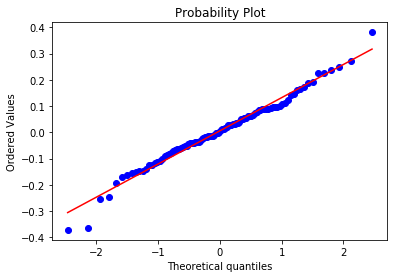

In [13]:
probplot(re2.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'danceability', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) não são nulas, portanto, podemos confiar nos valores do p value mostrados na tabela. Temos que os valores do p value das variáveis 'acousticnes' e 'liveness' estão altos, o que indica que talvez não tenha uma forte relação com tais variáveis. Pelo gráfico, observamos que a distibuição se aproxima de uma normal, salvo alguns outliers. Além disso, obtivemos um bom índice do R-squared (96%), o que indica que influencia nas variáveis 'valence' e 'energy', porém, não podemos afirmar que a variável 'danceability' é fortemente relacionada com as demais, devido aos altos valores do p value.

### Terceira variavel a ser analisada: speechiness

In [14]:
quant3 = [ 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability']

In [15]:
quant3_x = quant3.copy()

In [16]:
re3 = regre(dados.loc[:, quant3], dados.speechiness)
re3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            speechiness   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     18.89
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.25e-17
Time:                        19:37:47   Log-Likelihood:                 106.99
No. Observations:                 100   AIC:                            -196.0
Df Residuals:                      91   BIC:                            -172.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
instrumentalness    -0.4284      0.343     -1.248      0.215      -1.110       0.254
liveness            -0.0615      0.113     -0.545      0.587      -0.286       0.163
valence              0.0137      0.051      0.266      0.791      -0.089       0.116
tempo                0.0001      0.000      0.438      0.663      -0.001       0.001
loudness            -0.0201      0.006     -3.443      0.001      -0.032      -0.009
key                  0.0006      0.002      0.254      0.800      -0.004       0.005
acousticness        -0.0935      0.056     -1.675      0.097      -0.204       0.017
energy              -0.0386      0.069     -0.562      0.575      -0.175       0.098
danceability         0.0240      0.069      0.347      0.730      -0.114       0.162
==============================================================================
Omnibus:                       15.105   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.829
Skew:                           0.962   Prob(JB):                     0.000222
Kurtosis:                       3.581   Cond. No.                     4.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

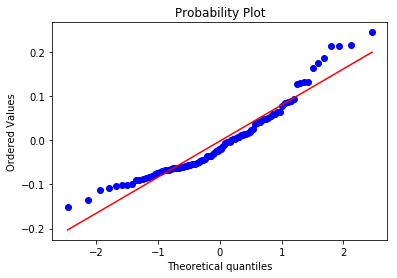

In [17]:
probplot(re3.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'speechiness', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) não são nulas, portanto, podemos confiar nos valores do p value mostrados na tabela. Temos que os valores do p value estão um pouo altos, o que indica que talvez não tenha uma forte relação com as outras variáveis. Pelo gráfico, observamos que a distibuição se aproxima de uma normal, salvo alguns outliers. Além disso, obtivemos um bom índice do R-squared (65%), porém, não podemos afirmar que a variável 'speechiness' é fortemente relacionada com as demais.

### Quarta variavel a ser analisada: instrumentalness

In [18]:
quant4 = [ 'liveness', 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness']

In [19]:
quant4_x = quant4.copy()

In [20]:
re4 = regre(dados.loc[:, quant4], dados.instrumentalness)
re4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       instrumentalness   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.002
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.444
Time:                        19:38:40   Log-Likelihood:                 226.47
No. Observations:                 100   AIC:                            -434.9
Df Residuals:                      91   BIC:                            -411.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
liveness        -0.0315      0.034     -0.925      0.358      -0.099       0.036
valence         -0.0067      0.016     -0.428      0.670      -0.038       0.024
tempo         3.929e-05   9.88e-05      0.398      0.692      -0.000       0.000
loudness        -0.0019      0.002     -1.027      0.307      -0.006       0.002
key             -0.0006      0.001     -0.875      0.384      -0.002       0.001
acousticness    -0.0129      0.017     -0.753      0.453      -0.047       0.021
energy           0.0202      0.021      0.978      0.331      -0.021       0.061
danceability    -0.0084      0.021     -0.399      0.691      -0.050       0.033
speechiness     -0.0393      0.031     -1.248      0.215      -0.102       0.023
==============================================================================
Omnibus:                      155.879   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6468.167
Skew:                           5.863   Prob(JB):                         0.00
Kurtosis:                      40.615   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

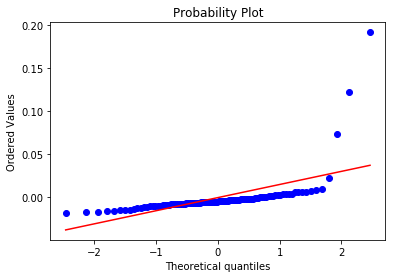

In [21]:
probplot(re4.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'instrumentalness', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) são nulas, portanto, não podemos confiar nos valores do p value mostrados na tabela. Ainda, obtivemos um baixo índice do R-squared (9%), ou seja, não podemos afirmar que a variável 'instrumentalness' é fortemente relacio

### Quinta variavel a ser analisada: liveness

In [22]:
quant5 = [ 'valence', 'tempo', 'loudness','key','acousticness', 'energy', 'danceability', 'speechiness', 'instrumentalness']

In [23]:
quant5_x = quant5.copy()

In [24]:
re5 = regre(dados.loc[:, quant5], dados.liveness)
re5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               liveness   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     39.18
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           1.47e-27
Time:                        19:39:44   Log-Likelihood:                 114.57
No. Observations:                 100   AIC:                            -211.1
Df Residuals:                      91   BIC:                            -187.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
valence             -0.0021      0.048     -0.043      0.966      -0.097       0.093
tempo                0.0001      0.000      0.345      0.731      -0.000       0.001
loudness            -0.0081      0.006     -1.417      0.160      -0.019       0.003
key                 -0.0006      0.002     -0.286      0.775      -0.005       0.004
acousticness        -0.0444      0.052     -0.850      0.398      -0.148       0.059
energy               0.1529      0.062      2.481      0.015       0.030       0.275
danceability         0.0145      0.064      0.226      0.822      -0.113       0.142
speechiness         -0.0529      0.097     -0.545      0.587      -0.246       0.140
instrumentalness    -0.2954      0.319     -0.925      0.358      -0.930       0.339
==============================================================================
Omnibus:                       22.901   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.957
Skew:                           1.173   Prob(JB):                     3.13e-07
Kurtosis:                       4.300   Cond. No.                     4.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fazendo uma análise da variável 'liveness', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) são praticamente nulas, portanto, não podemos confiar nos valores do p value mostrados na tabela. Ainda, obtivemos um alto índice do R-squared (79%), porém, não podemos afirmar que a variável 'instrumentalness' é fortemente relacionada com as demais.

### Sexta variável a ser analisada: valence

In [25]:
quant6 = [ 'tempo', 'loudness','acousticness', 'energy', 'danceability', 'speechiness','instrumentalness']

In [26]:
quant6_x = quant6.copy()

In [27]:
re6 = regre(dados.loc[:, quant6], dados.valence)
re6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     132.6
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           1.59e-45
Time:                        19:40:27   Log-Likelihood:                 35.865
No. Observations:                 100   AIC:                            -57.73
Df Residuals:                      93   BIC:                            -39.49
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
tempo               -0.0005      0.001     -0.830      0.409      -0.002       0.001
loudness             0.0301      0.012      2.553      0.012       0.007       0.054
acousticness         0.2468      0.111      2.231      0.028       0.027       0.467
energy               0.3560      0.125      2.844      0.005       0.107       0.605
danceability         0.6764      0.121      5.605      0.000       0.437       0.916
speechiness          0.0571      0.211      0.271      0.787      -0.361       0.475
instrumentalness    -0.2978      0.691     -0.431      0.667      -1.670       1.074
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.224
Skew:                           0.100   Prob(JB):                        0.894
Kurtosis:                       3.118   Cond. No.                     4.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

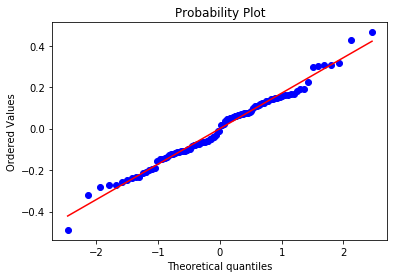

In [28]:
probplot(re6.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'valence', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) não são nulas, portanto, podemos confiar nos valores do p value mostrados na tabela. Temos que os valores do p value das variáveis 'liveness' e 'key' estão muito altos, o que indica que talvez não tenha uma forte relação de tais com as outras variáveis, e, assim, são irrelevantes, podendo ser descartadas. Pelo gráfico, observamos que a distibuição se aproxima muito da reta, podendo dizer que é uma normal. Além disso, obtivemos um bom índice do R-squared (90%), então podemos afirmar que a variável 'speechiness' é fortemente relacionada com as demais.

### Sétima variável a ser analisada: tempo

In [29]:
quant7 = [ 'loudness','acousticness', 'energy', 'danceability', 'valence']

In [30]:
quant7_x = quant7.copy()

In [31]:
re7 = regre(dados.loc[:, quant7], dados.tempo)
re7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     380.0
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           3.73e-61
Time:                        19:41:19   Log-Likelihood:                -470.40
No. Observations:                 100   AIC:                             950.8
Df Residuals:                      95   BIC:                             963.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
loudness       -10.1595      1.456     -6.976      0.000     -13.051      -7.268
acousticness   -24.7117     17.291     -1.429      0.156     -59.038       9.615
energy         126.9614     15.567      8.156      0.000      96.056     157.866
danceability   -16.8989     21.720     -0.778      0.438     -60.018      26.220
valence        -13.6444     16.125     -0.846      0.400     -45.657      18.369
==============================================================================
Omnibus:                        1.500   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.352
Skew:                           0.283   Prob(JB):                        0.509
Kurtosis:                       2.938   Cond. No.                         54.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

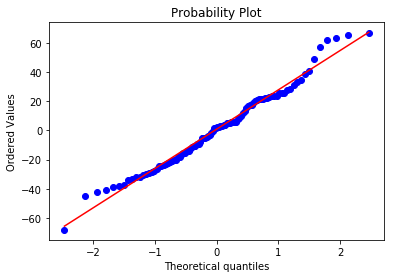

In [32]:
probplot(re7.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'tempo', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) não são nulas, portanto, podemos confiar nos valores do p value mostrados na tabela. Temos que os valores do p value das variáveis 'speechiness', 'liveness' e 'key' estão muito altos, o que indica que talvez não tenha uma forte relação de tais com as outras variáveis, e, assim, são irrelevantes, podendo ser descartadas. Pelo gráfico, observamos que a distibuição se aproxima muito da reta, salvo alguns outliers, então podemos dizer que é uma normal. Além disso, obtivemos um bom índice do R-squared (95%), então podemos afirmar que a variável 'tempo' é fortemente relacionada com as demais.

### Oitava variável a ser analisada: loudness

In [34]:
quant8 = [ 'key','acousticness', 'energy', 'danceability', 'speechiness', 'valence', 'tempo']

In [35]:
quant8_x = quant8.copy()

In [36]:
re8 = regre(dados.loc[:, quant8], dados.loudness)
re8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loudness   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     218.2
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           8.16e-55
Time:                        19:42:16   Log-Likelihood:                -177.01
No. Observations:                 100   AIC:                             368.0
Df Residuals:                      93   BIC:                             386.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
key             -0.0627      0.040     -1.583      0.117      -0.141       0.016
acousticness    -2.9476      0.902     -3.266      0.002      -4.740      -1.156
energy           3.5477      1.060      3.347      0.001       1.443       5.653
danceability    -6.0957      0.988     -6.167      0.000      -8.059      -4.133
speechiness     -5.5519      1.661     -3.342      0.001      -8.850      -2.253
valence          2.1631      0.841      2.571      0.012       0.493       3.834
tempo           -0.0283      0.005     -6.039      0.000      -0.038      -0.019
==============================================================================
Omnibus:                        1.432   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.184
Skew:                          -0.266   Prob(JB):                        0.553
Kurtosis:                       3.017   Cond. No.                     1.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

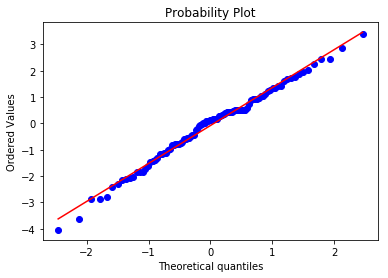

In [37]:
probplot(re8.resid, dist='norm', plot=plt);

Fazendo uma análise da variável 'loudness', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) não são nulas, portanto, podemos confiar nos valores do p value mostrados na tabela. Temos que os valores do p value da variável 'liveness' está um pouco alto, o que indica que talvez não tenha uma forte relação de tais com as outras variáveis, e, assim, pode ser descartada. Pelo gráfico, observamos que a distibuição se aproxima muito da reta, então podemos afirmar que é uma normal. Além disso, obtivemos um bom índice do R-squared (94%), então podemos afirmar que a variável 'loudness' é fortemente relacionada com as demais.

### Nona variável a ser analisada: key

In [38]:
quant9 = [ 'acousticness', 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness']

In [39]:
quant9_x = quant9.copy()

In [40]:
re9 = regre(dados.loc[:, quant9], dados.key)
re9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    key   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     26.81
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           5.92e-21
Time:                        19:43:09   Log-Likelihood:                -271.85
No. Observations:                 100   AIC:                             559.7
Df Residuals:                      92   BIC:                             580.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
acousticness     1.0699      2.479      0.432      0.667      -3.853       5.993
energy           6.2767      2.931      2.141      0.035       0.455      12.098
danceability    -1.2287      3.044     -0.404      0.687      -7.274       4.816
speechiness      1.7051      4.564      0.374      0.710      -7.360      10.770
liveness        -1.0150      4.945     -0.205      0.838     -10.837       8.807
valence          0.0570      2.260      0.025      0.980      -4.431       4.545
tempo           -0.0031      0.014     -0.218      0.828      -0.032       0.025
loudness        -0.4257      0.268     -1.588      0.116      -0.958       0.107
==============================================================================
Omnibus:                       35.151   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.507
Skew:                          -0.162   Prob(JB):                       0.0386
Kurtosis:                       1.793   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fazendo uma análise da variável 'key', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) são praticamente nulas, portanto, não podemos confiar nos altos valores do p value mostrados na tabela. Ainda, obtivemos um alto índice do R-squared (70%), porém, não podemos afirmar com certeza que a variável 'key' é fortemente relacionada com as demais.

### Décima variável a ser analisada: acousticness

In [41]:
quant10 = [ 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness', 'key']

In [42]:
quant10_x = quant10.copy()

In [43]:
re10 = regre(dados.loc[:, quant10], dados.acousticness)
re10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acousticness   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     15.22
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           5.14e-14
Time:                        19:43:54   Log-Likelihood:                 45.117
No. Observations:                 100   AIC:                            -74.23
Df Residuals:                      92   BIC:                            -53.39
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
energy          -0.0174      0.126     -0.138      0.890      -0.268       0.233
danceability     0.0022      0.128      0.017      0.986      -0.252       0.256
speechiness     -0.3031      0.189     -1.601      0.113      -0.679       0.073
liveness        -0.1630      0.207     -0.787      0.433      -0.574       0.248
valence          0.2080      0.092      2.250      0.027       0.024       0.392
tempo           -0.0008      0.001     -1.282      0.203      -0.002       0.000
loudness        -0.0359      0.011     -3.330      0.001      -0.057      -0.014
key              0.0019      0.004      0.432      0.667      -0.007       0.011
==============================================================================
Omnibus:                       12.136   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.092
Skew:                           0.876   Prob(JB):                      0.00144
Kurtosis:                       3.265   Cond. No.                     1.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fazendo uma análise da variável 'acousticness', podemos observar que as probabilidades de Omnibus e de Jarque-Bera(JB) são praticamente nulas, portanto, não podemos confiar nos altos valores do p value mostrados na tabela. Ainda, obtivemos um alto índice do R-squared (57%), porém, não podemos afirmar com certeza que a variável 'acousticness' é fortemente relacionada com as demais.

### Regressão

Como primeira iteração, nós tinhamos como proposta comparar as musicas que estavam no top 50 do spotify no ano de 2017, com as musicas que estavam no top 50 de 2016, para assim prever se as musicas de 2016 teriam possibilidade de estar no top 50 de 2017. Com o andamento do projeto, fomos para uma outra solução, pegar as 10 musicas mais tocadas do top 50, e assim fazer uma regressão linear com as variaveis disponibilizadas pelo spotify, podendo prever dada uma musica qualquer qual a probabilidade dela estar dentro do top 10 do spotify.


Lendo o arquivo csv:

In [44]:
df = pd.read_csv('dataset.csv')

_For_ para selecionar as 10 primeiras musicas mais tocadas no spotify no ano de 2017:

In [45]:
top10 = []
for i in range(50):
    if i < 10:
        top10.append(1)
    else:
        top10.append(0)


Variáveis:

In [46]:
quantitativas = [ 'energy', 'danceability', 'speechiness', 'liveness', 'valence', 'tempo', 'loudness', 'key', 'instrumentalness']

Regressão:

In [47]:
resultado = regre(df.loc[:, quantitativas], top10)
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     2.055
Date:                Thu, 22 Nov 2018   Prob (F-statistic):             0.0571
Time:                        19:45:56   Log-Likelihood:                -21.403
No. Observations:                  50   AIC:                             60.81
Df Residuals:                      41   BIC:                             78.01
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy               0.1609      0.470      0.343      0.734      -0.788       1.109
danceability        -0.5124      0.506     -1.013      0.317      -1.534       0.509
speechiness         -1.3058      1.042     -1.254      0.217      -3.409       0.798
liveness            -0.1899      0.377     -0.504      0.617      -0.952       0.572
valence              0.4361      0.356      1.226      0.227      -0.282       1.155
tempo                0.0007      0.002      0.309      0.759      -0.004       0.005
loudness            -0.0518      0.032     -1.604      0.116      -0.117       0.013
key                  0.0042      0.018      0.232      0.818      -0.033       0.041
instrumentalness    -0.9620      1.225     -0.785      0.437      -3.436       1.512
==============================================================================
Omnibus:                       10.452   Durbin-Watson:                   0.303
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.570
Skew:                           1.178   Prob(JB):                      0.00307
Kurtosis:                       2.917   Cond. No.                     2.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

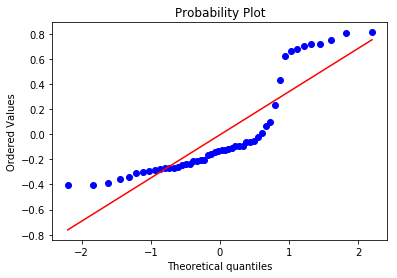

In [48]:
probplot(resultado.resid, dist='norm', plot=plt);

Foi possível observar, que a regressão acima não segue uma normal, além de que o _R-squared_ e o _Prob(Omnibus)_ deram valores muito baixos, indicando que a regressão não pe confiavél.
Após está tentativas, optamos por mudar a perguntas e fazer a análise de todas as variáveis uma a uma.

### Divisão de tarefas do projeto 3:

Nós nos responsabilizamos em dividir igualmente o trabalho, para nao sobrecarregar nenhuma das duas integrantes do grupo,
escolhemos o tema do projeto e juntas, a responsável para pegar o dadaset do spotify foi a Beatriz Mie, a análise exploratória foi feita pela Vitória de Almeida, e por fim, a regressão junto com as análises foi feita pelas duas juntas no horário de aula e nos intervalos.

### Conclusão:

Foi possivel concluir com a nossa regressão que as variaveis que menos se adequam são: speechiness, instrumentalness, acousticness, pois possuem um _R-squared_ mais baixo em relação as outras variáveis, o que significa que 